In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import numpy as np
os.environ['KMP_DUPLICATE_LIB_OK']='True'

2024-08-20 22:56:05.735123: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-20 22:56:06.724536: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_dataset = train_datagen.flow_from_directory('../datasets/character/train', 
                                          target_size=(60,60),
                                          batch_size=32,
                                          class_mode="categorical")
test_dataset = test_datagen.flow_from_directory('../datasets/character/test', 
                                          target_size=(60,60),
                                          batch_size=32,
                                          class_mode="categorical")                                   

Found 1856 images belonging to 13 classes.
Found 470 images belonging to 13 classes.


In [6]:
train_dataset.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'ba': 10,
 'ga': 11,
 'pa': 12}

In [7]:
def dataset_to_numpy_array(generator):
    data = []
    labels = []
    for i in range(len(generator)):
        batch_data, batch_labels = generator[i]
        data.append(batch_data)
        labels.append(batch_labels)
    
    data = np.concatenate(data, axis=0)
    labels = np.concatenate(labels, axis=0)
    
    return data, labels

# Convert datasets to NumPy arrays
x_train_r, y_train_r = dataset_to_numpy_array(train_dataset)
x_test_r, y_test_r = dataset_to_numpy_array(test_dataset)

print(x_train_r.shape, y_train_r.shape)
print(x_test_r.shape, y_test_r.shape)

(1856, 60, 60, 3) (1856, 13)
(470, 60, 60, 3) (470, 13)


In [19]:
# Define the CNN model
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=x_train_r.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3))) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.4))  # Adding dropout with rate 0.4

model.add(Dense(13))  # Assuming there are 13 classes
model.add(Activation("softmax"))

# Note: There is no explicit threshold used in this model definition.
# Thresholds are typically used in binary classification problems or 
# when post-processing the output of the model. In this multi-class
# classification model using softmax activation, the class with the
# highest probability is typically chosen as the predicted class,
# which doesn't involve an explicit threshold.

In [20]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 58, 58, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 27, 27, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │       692,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 13)             │           845 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 13)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 731,853 (2.79 MB)

 Trainable params: 731,853 (2.79 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(x_train_r, y_train_r, epochs=100, batch_size=32, validation_data=(x_test_r, y_test_r))

# Evaluate the model
loss, accuracy = model.evaluate(x_test_r, y_test_r)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.6062 - loss: 1.2421 - val_accuracy: 0.6683 - val_loss: 1.1815
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.6331 - loss: 1.0823 - val_accuracy: 0.6854 - val_loss: 1.1544
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.6649 - loss: 1.0152 - val_accuracy: 0.7098 - val_loss: 1.1225
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.6690 - loss: 1.0002 - val_accuracy: 0.7073 - val_loss: 1.1578
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.6910 - loss: 0.9329 - val_accuracy: 0.7146 - val_loss: 1.1200
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.6937 - loss: 0.9536 - val_accuracy: 0.7171 - val_loss: 1.1081
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.6901 - loss: 0.9307 - val_accuracy: 0.7024 - val_loss: 1.1017
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.7204 - loss: 0.8616 - val_accuracy:

In [23]:
model.history.history

{}

In [26]:
predictions = model.predict([x_test_r])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [27]:
np.argmax(predictions[0])

12

In [29]:
import matplotlib.pyplot as plt

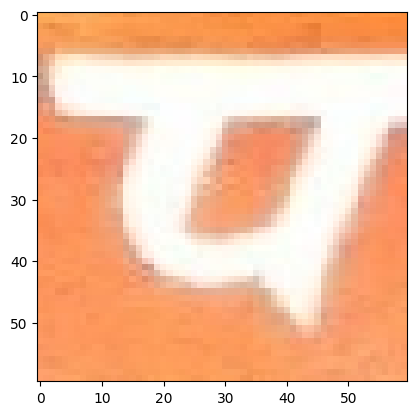

In [30]:
plt.imshow(x_test_r[0])

In [32]:
np.argmax(predictions[14])

7

In [35]:
def get_predicted_class(predictions, class_indices):
    # Get the index of the maximum value in predictions array
    predicted_index = np.argmax(predictions)
    
    # Reverse the class_indices dictionary to map indices to keys
    index_to_class = {v: k for k, v in class_indices.items()}
    
    # Get the predicted class key
    predicted_class = index_to_class[predicted_index]
    
    
    return predicted_class

In [40]:
get_predicted_class(predictions[106],train_dataset.class_indices)

'ba'

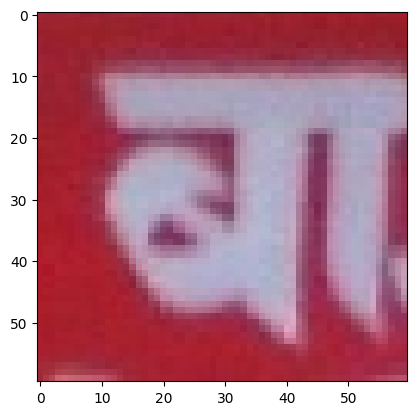

In [41]:
plt.imshow(x_test_r[106])

In [48]:
model.save('recognition.keras')

In [49]:
from tensorflow.keras.models import load_model

In [50]:
loaded_model = load_model('recognition.keras')

/home/zephyr/Desktop/.code/college/alnpr/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [51]:
prediction = loaded_model.predict([x_test_r])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [55]:
len(x_test_r)

410

In [108]:
get_predicted_class(prediction[185],train_dataset.class_indices)

'4'

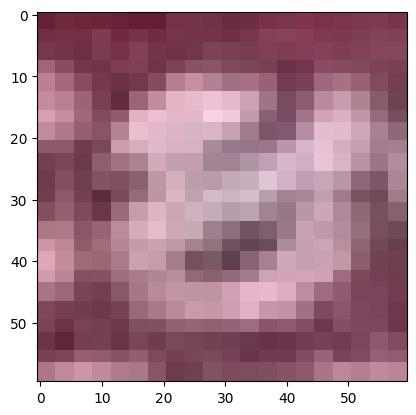

In [109]:
plt.imshow(x_test_r[185])

In [111]:
model.history.history

{}